In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'
plt.gray()

In [40]:
from epypes import pipeline
from epypes import compgraph

from rpa import cbcalib
from rpa.io import open_image

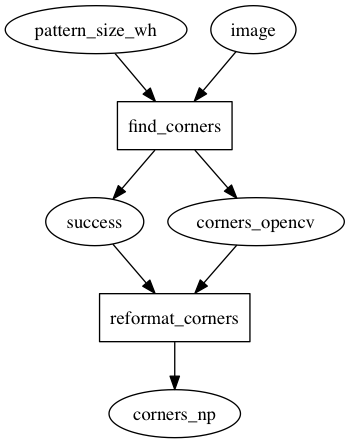

In [41]:
cg_corners = cbcalib.CGFindCorners()
nxpd.draw(cg_corners.to_networkx())

In [42]:
im = open_image(opj(CODE_DIR, 'DATA/IMG/calib/opencv_left/left01.jpg'))
psize = (9, 6)

In [43]:
runner = compgraph.CompGraphRunner(cg_corners, frozen_tokens={'pattern_size_wh': psize})

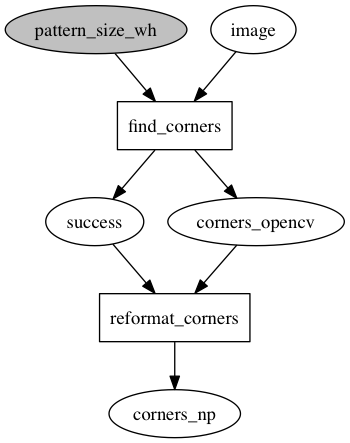

In [44]:
nxpd.draw(runner.token_manager.to_networkx())

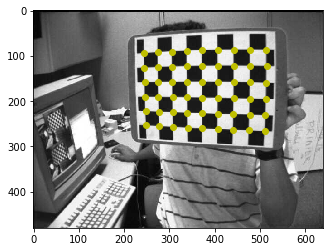

In [45]:
runner.run(image=im)
corners = runner.token_value('corners_np')

plt.figure()
plt.imshow(im)
plt.plot(corners[:, 0], corners[:, 1], 'yo')